# Importar Bibliotecas Necessárias
Importe as bibliotecas necessárias, incluindo pandas, numpy, scikit-learn e matplotlib.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Carregar e Explorar o Conjunto de Dados

Carregar o dataset e visualizar o *head*, além de transformar dados categóricos em numéricos via **One-Hot Encoding**

In [13]:
df = pd.read_csv('Modelo\\Data.csv')

df.head()

,QT_VOTOS,VR_DESPESA_CONTRATADA
0,1125,213127.50
1,27393,3016571.30
2,771,99998.00
3,242100,4077998.59
4,103265,2462596.06


In [16]:
scaler = MinMaxScaler()
df[['VR_DESPESA_CONTRATADA', 'QT_VOTOS']] = scaler.fit_transform(df[['VR_DESPESA_CONTRATADA', 'QT_VOTOS']])

df.head()

,QT_VOTOS,VR_DESPESA_CONTRATADA
0,0.000021,0.005654
1,0.001145,0.080912
2,0.000005,0.002617
3,0.010335,0.109405
4,0.004393,0.066040


# Dividir os Dados em Conjuntos de Treinamento e Teste
Divida o conjunto de dados em conjuntos de treinamento e teste usando train_test_split do scikit-learn.

In [17]:
X = df.drop('QT_VOTOS', axis=1)
y = df['QT_VOTOS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((158, 1), (40, 1), (158,), (40,))

# Treinar o Modelo de Regressão Linear
Treine um modelo de Regressão Linear usando os dados de treinamento.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Data: {mse_train}")

Mean Squared Error on Training Data: 0.004301699649770509
Mean Squared Error on Testing Data: 0.0026247105626961134


# Evaluate the Model
Evaluate the model's performance using metrics such as Mean Absolute Error (MAE) and R-squared.

Mean Squared Error on Testing Data: 0.0026247105626961134
Mean Absolute Error on Testing Data: 0.04129582064067262
R-squared on Testing Data: -0.022703635176336334


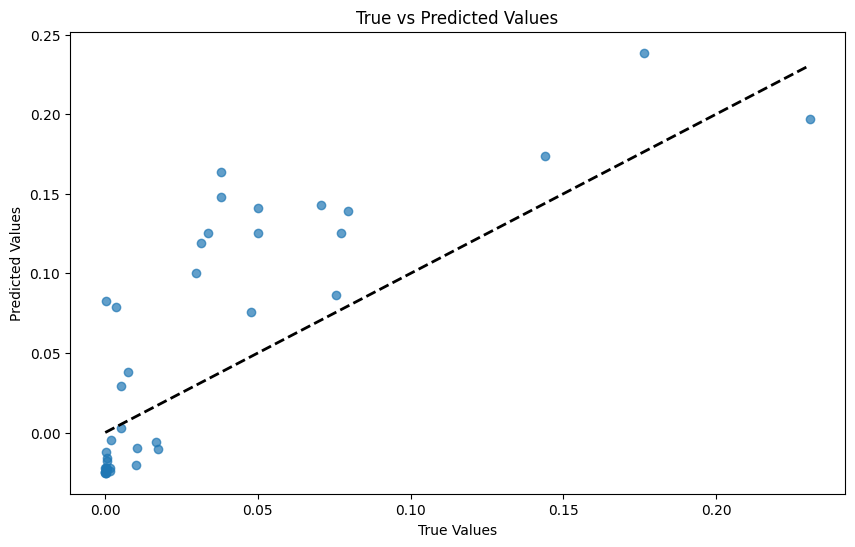

In [21]:
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Testing Data: {mse_test}")
print(f"Mean Absolute Error on Testing Data: {mae_test}")
print(f"R-squared on Testing Data: {r2_test}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Random Forest - MSE: 0.0024507751779891873
Random Forest - MAE: 0.028857142789878543
Random Forest - R²: 0.04506930434460055


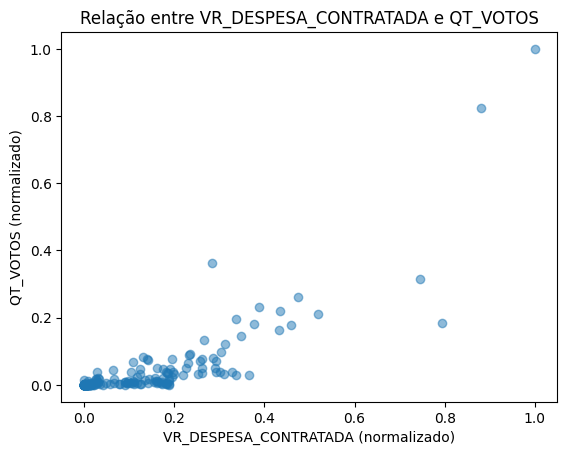

In [24]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_test_pred_rf = model_rf.predict(X_test)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - MSE: {mse_test_rf}")
print(f"Random Forest - MAE: {mae_test_rf}")
print(f"Random Forest - R²: {r2_test_rf}")

plt.scatter(df['VR_DESPESA_CONTRATADA'], df['QT_VOTOS'], alpha=0.5)
plt.title("Relação entre VR_DESPESA_CONTRATADA e QT_VOTOS")
plt.xlabel("VR_DESPESA_CONTRATADA (normalizado)")
plt.ylabel("QT_VOTOS (normalizado)")
plt.show()

# Make Predictions
Use the trained model to make predictions on new data and visualize the results.

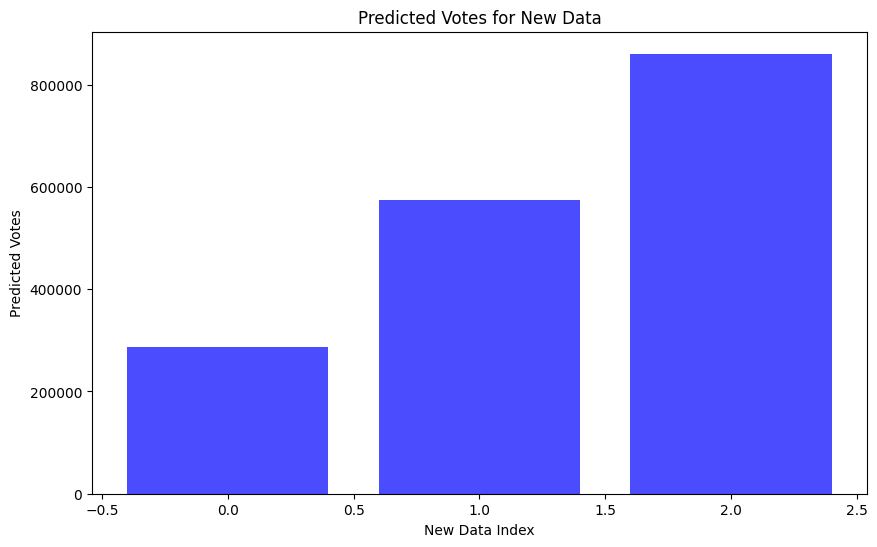

In [22]:
new_data = pd.DataFrame({
    'VR_DESPESA_CONTRATADA': [500000, 1000000, 1500000],
    'SG_PARTIDO': ['PSOL', 'PSD', 'PT'],
    'SG_UF_AC': [1, 0, 0],
    'SG_UF_AL': [0, 1, 0],
    'SG_UF_AP': [0, 0, 1]
})

new_data = pd.get_dummies(new_data, columns=['SG_PARTIDO'], drop_first=True)

new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Make predictions on the new data
new_predictions = model.predict(new_data)

new_data['Predicted_QT_VOTOS'] = new_predictions
new_data

plt.figure(figsize=(10, 6))
plt.bar(new_data.index, new_data['Predicted_QT_VOTOS'], color='blue', alpha=0.7)
plt.xlabel('New Data Index')
plt.ylabel('Predicted Votes')
plt.title('Predicted Votes for New Data')
plt.show()